In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.learning_curve import learning_curve
import matplotlib.patches as mpatches
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
pd.options.mode.chained_assignment = None
from sklearn import preprocessing


%matplotlib inline

In [2]:
df = pd.read_csv("3355.csv")

//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (11,14,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


### Condensing dataframe down to important factors to explore

In [3]:
df2 = df[[
'CASENUM','YEAROB1','SEX1','RACE1','ETHNIC1',
'RELTYP','NFRCTNS','DRUGAB','DRUGTRT','ALCTRT',
'SEXTRT','EDUCAT','VOCAT','STATE','DFM','DDMV','DFIR','DCDV','DEAD',
'SMPOFF5','RELAGE','RLAGE','SNTLN','TMSRV','PRIR','PPRID','POTST',
'A001CNT', 'A001YR','A001MO','A001ST','A001FM1','A001DSP1','A001DMV1','A001FIR1','A001CDV1',
'REARR','RCNVCT','RCNFIN','RPRS','RPRSITV','ROTST']]
df2

,CASENUM,YEAROB1,SEX1,RACE1,ETHNIC1,RELTYP,NFRCTNS,DRUGAB,DRUGTRT,ALCTRT,...,A001DSP1,A001DMV1,A001FIR1,A001CDV1,REARR,RCNVCT,RCNFIN,RPRS,RPRSITV,ROTST
0,1,1932,MALE,WHITE,HISPANIC,OTHER UNCONDITIONAL RELEASE,INMATE HAS RECORD,INMATE IS A DRUG ABUSER,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,4,3,3,1,NOT APPLICABLE,0
1,2,1929,MALE,WHITE,HISPANIC,OTHER CONDITIONAL RELEASE,NO RECORD,INMATE IS A DRUG ABUSER,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1,1,1,0,NOT APPLICABLE,0
2,3,1934,MALE,WHITE,HISPANIC,PAROLE BOARD DECISION-SERVED NO MINIMUM,INMATE HAS RECORD,NOT A DRUG ABUSER,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1,1,1,1,NOT APPLICABLE,0
3,4,1931,MALE,BLACK,NONHISPANIC,OTHER UNCONDITIONAL RELEASE,NO RECORD,UNKNOWN,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,888,888,888,888,NOT APPLICABLE,888
4,5,1942,MALE,WHITE,NONHISPANIC,EXPIRATION OF SENTENCE,NO RECORD,UNKNOWN,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1,0,0,0,NOT APPLICABLE,0
5,6,1936,MALE,WHITE,NONHISPANIC,"RELEASE TO CUSTODY, DETAINER, OR WARRANT",NO RECORD,INMATE IS A DRUG ABUSER,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,1,888,1,888,NOT APPLICABLE,888
6,7,1947,FEMALE,WHITE,HISPANIC,"RELEASE TO CUSTODY, DETAINER, OR WARRANT",NO RECORD,INMATE IS A DRUG ABUSER,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,3,888,0,888,NOT APPLICABLE,888
7,8,1944,MALE,WHITE,NONHISPANIC,MANDATORY PAROLE RELEASE,INMATE HAS RECORD,UNKNOWN,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,888,888,888,888,NOT APPLICABLE,888
8,9,1942,MALE,AMERICAN INDIAN/ALEUTIAN,NONHISPANIC,EXPIRATION OF SENTENCE,INMATE HAS RECORD,NOT A DRUG ABUSER,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,3,1,1,0,NOT APPLICABLE,0
9,10,1939,MALE,WHITE,HISPANIC,OTHER CONDITIONAL RELEASE,INMATE HAS RECORD,INMATE IS A DRUG ABUSER,UNKNOWN,UNKNOWN,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,3,1,1,1,NOT APPLICABLE,0


###Replace unknown or not applicable data with np.nan (for now) for numerical features

In [4]:
df2['YEAROB1'] = df2['YEAROB1'].replace(9999,np.nan)
df2['REARR'] = df2['REARR'].replace(888,np.nan)
df2['ROTST'] = df2['ROTST'].replace(888,np.nan)
df2['PRIR'] = df2['PRIR'].replace(888,np.nan)
df2['POTST'] = df2['POTST'].replace(888,np.nan)
df2['RELAGE'] = df2['RELAGE'].replace(99999999.99,np.nan)

###Adding calculated features

In [5]:
#df2['AVG_YRLY_ARR'] = 0
df2['TOT_PRARR'] = (df2['PRIR'] + df2['POTST'])
df2['CAREER_LEN'] = (1994-df2['A001YR'])
df2['SNTLN_YRS'] = df2.SNTLN/12
df2['TOTREARR'] = df2.REARR + df2.ROTST
df2["RESP"] = 0
df2['RESP'][df2['TOTREARR'] > 0] = 1

###Exploratory data analysis

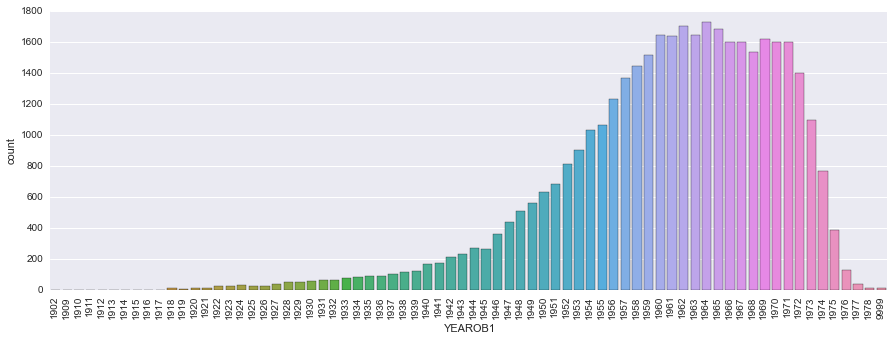

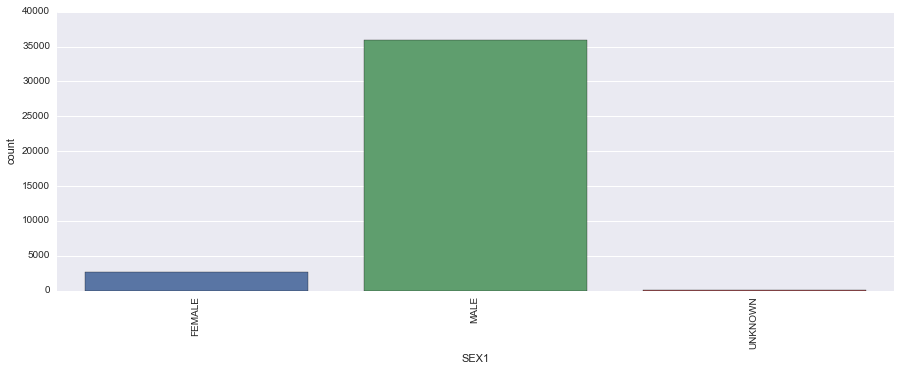

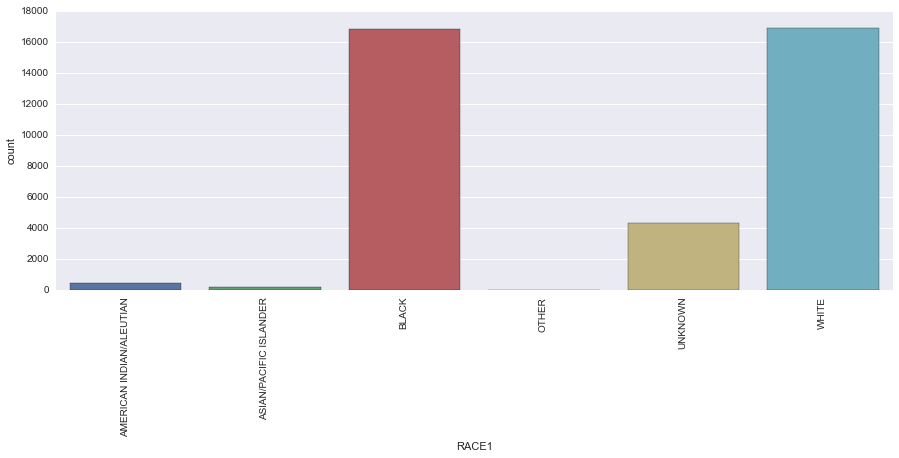

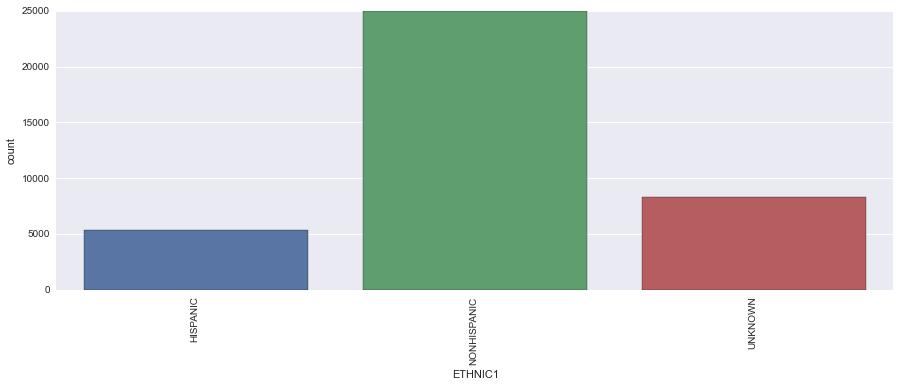

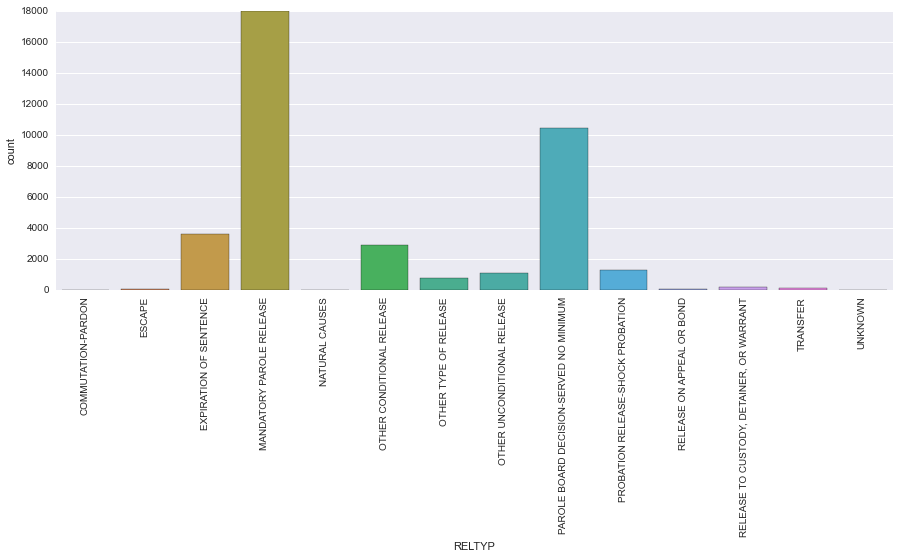

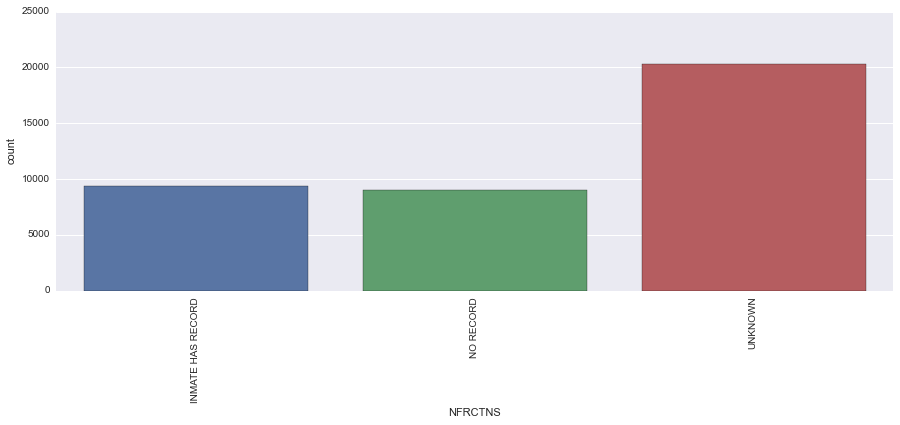

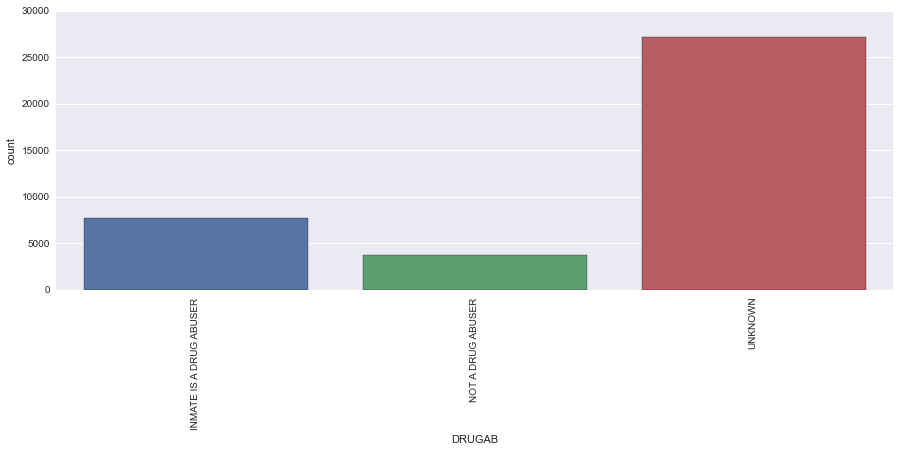

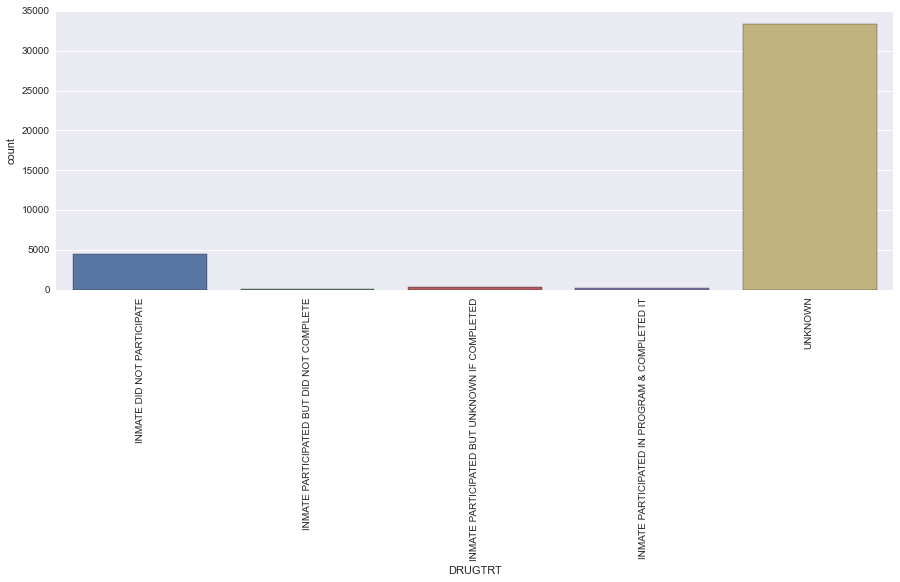

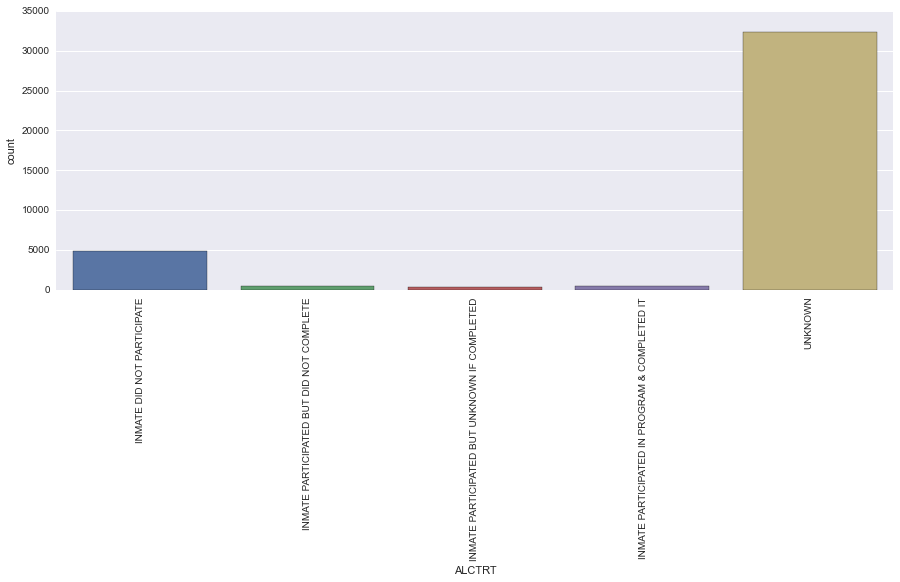

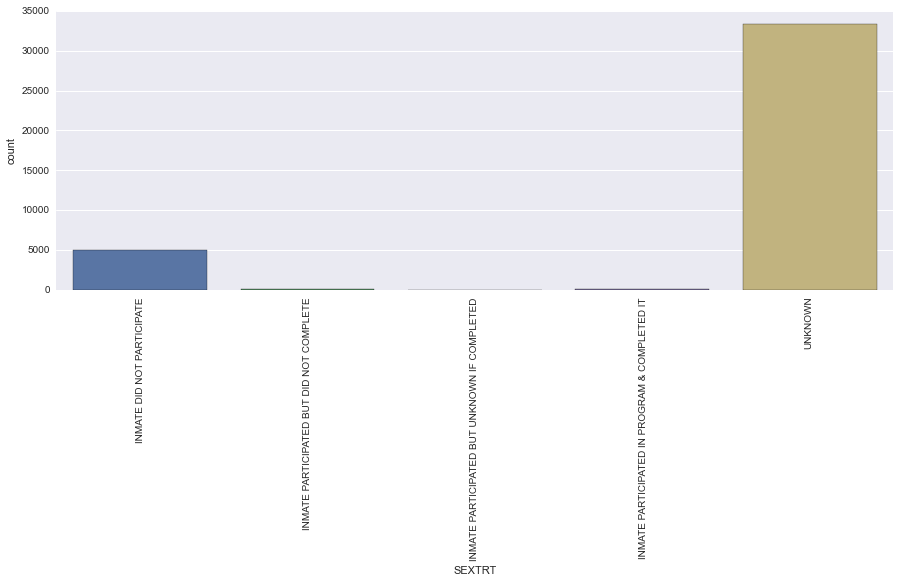

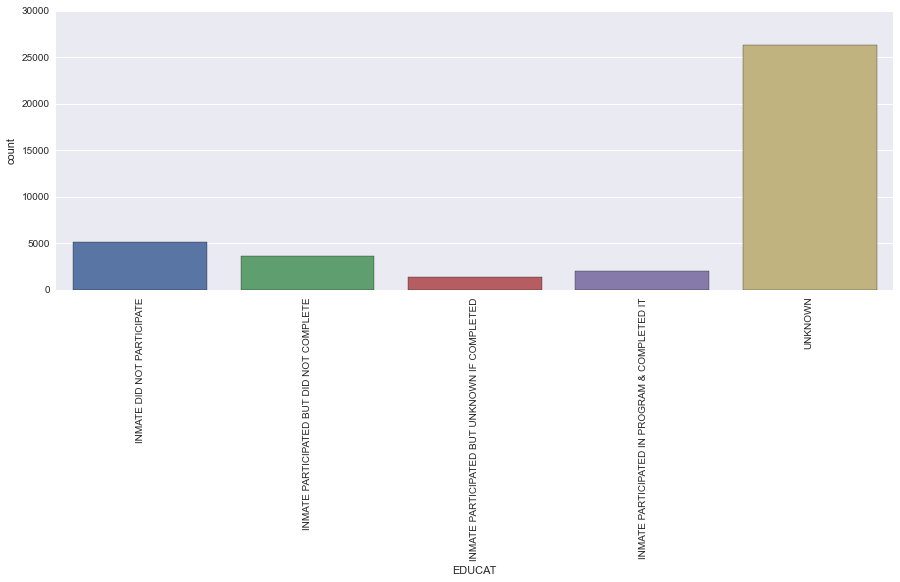

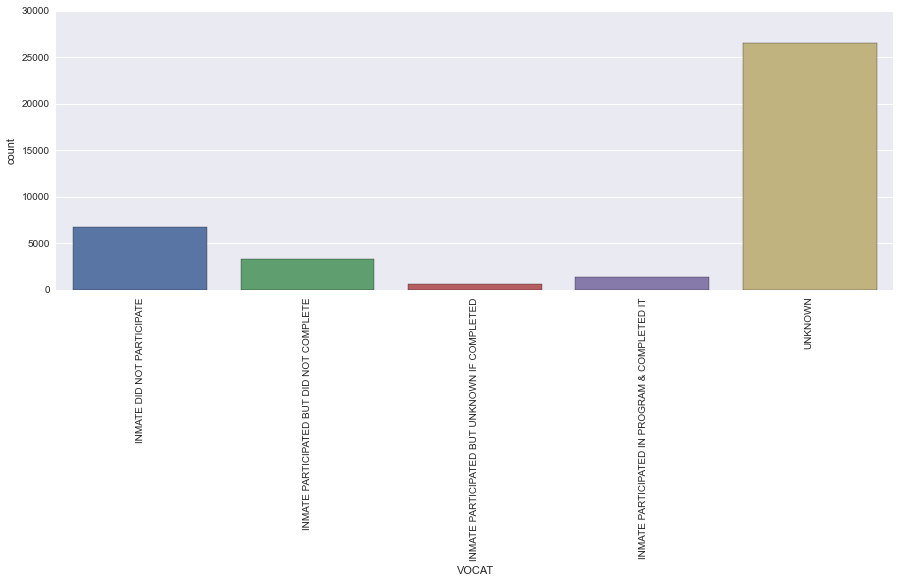

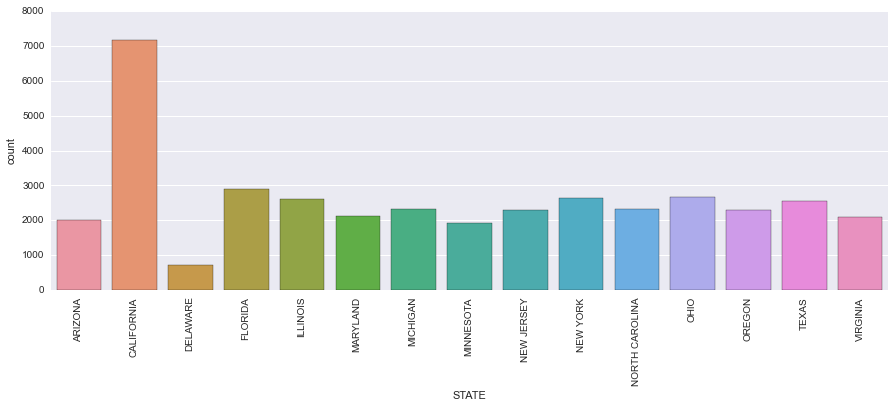

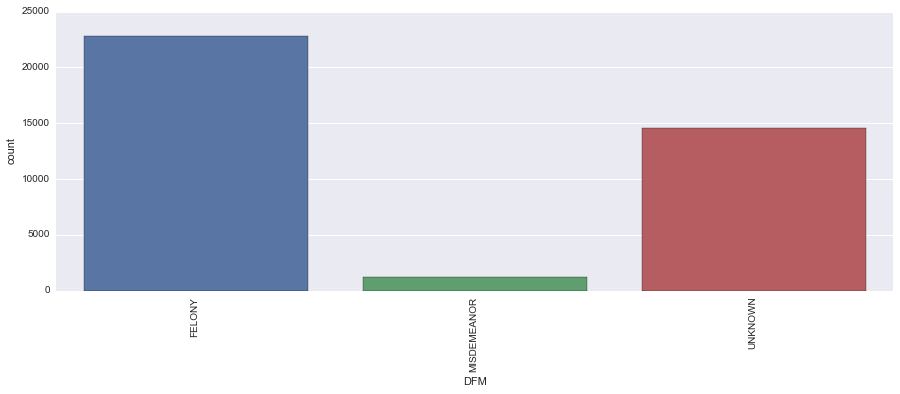

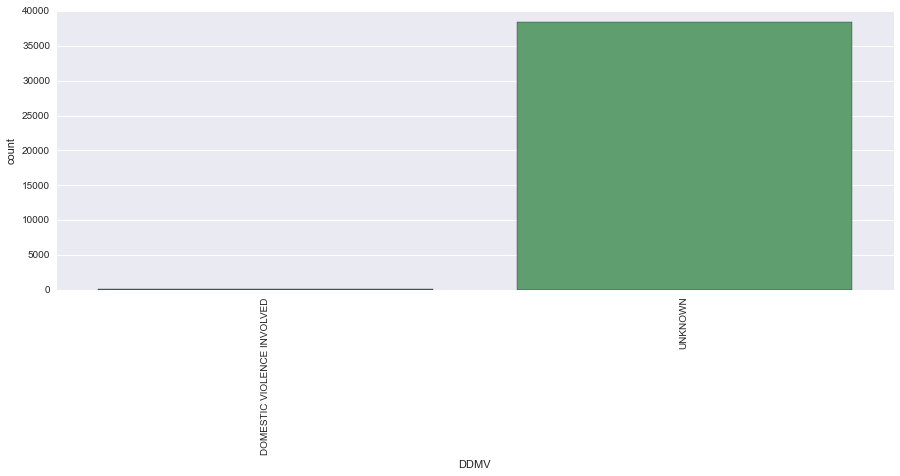

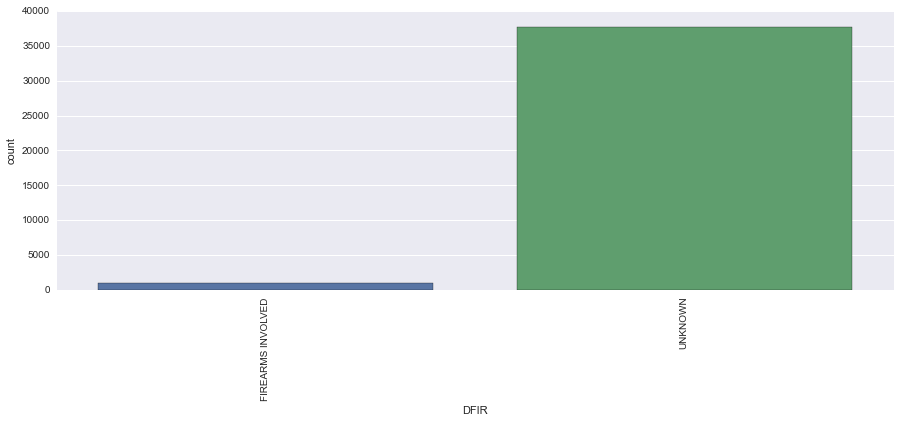

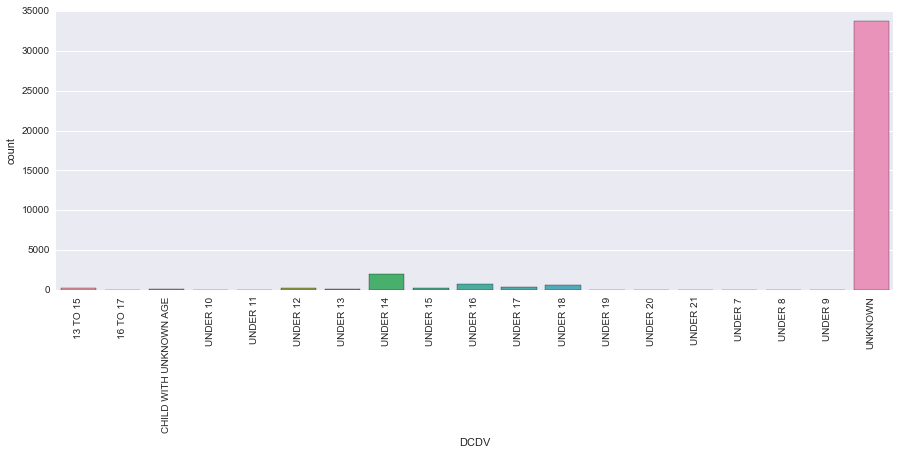

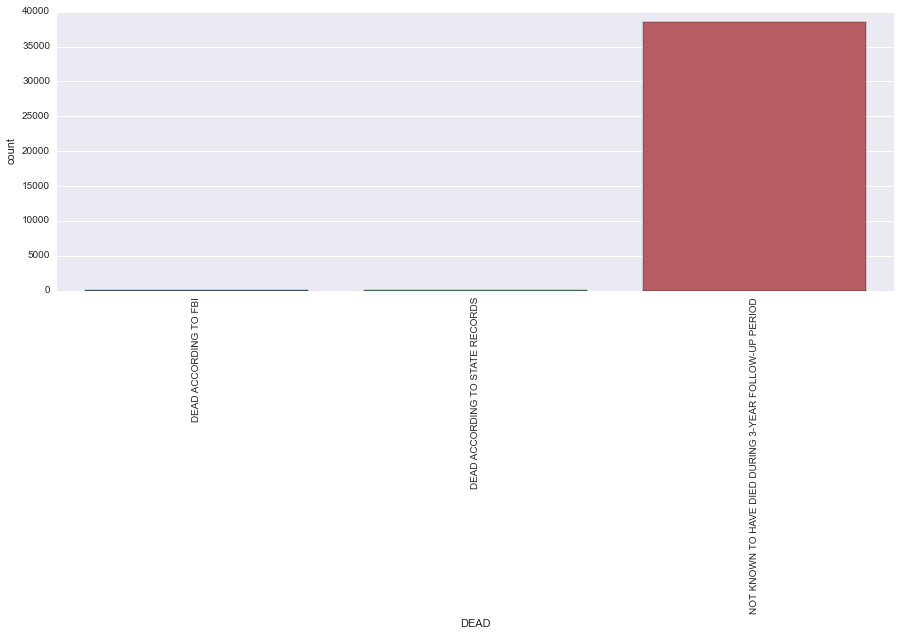

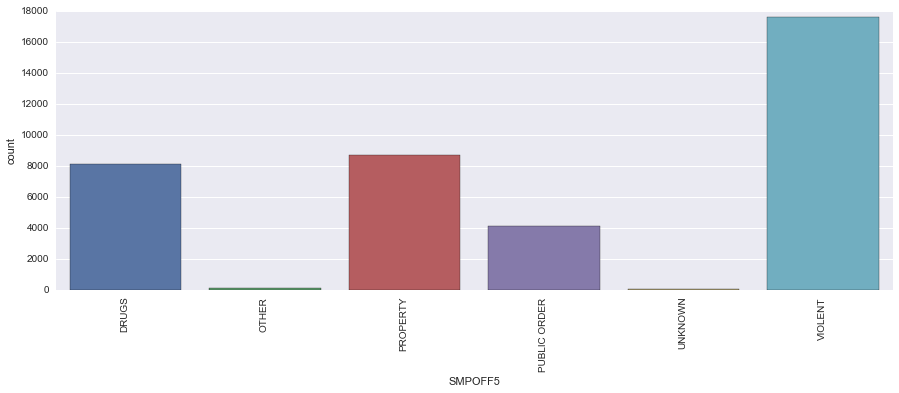

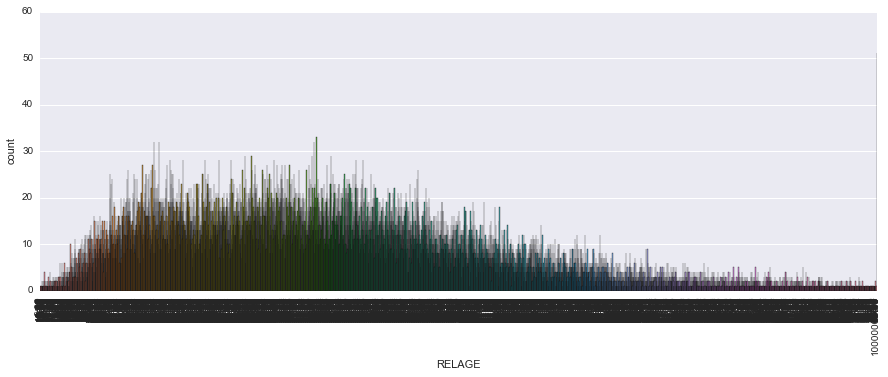

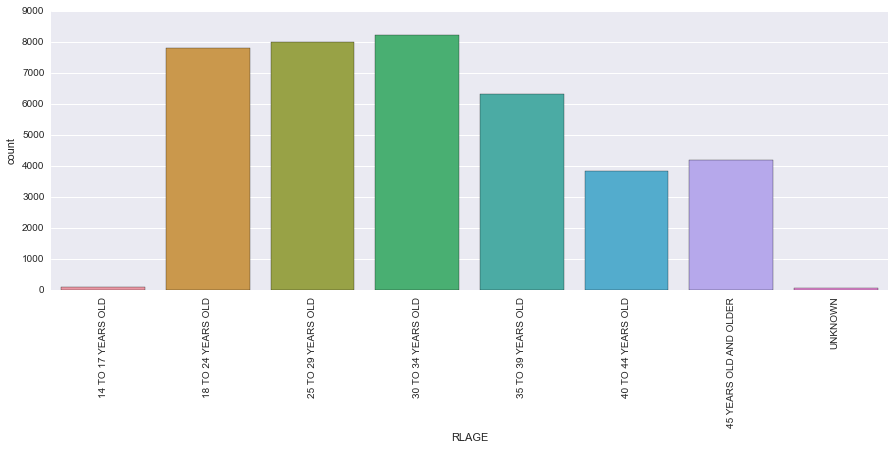

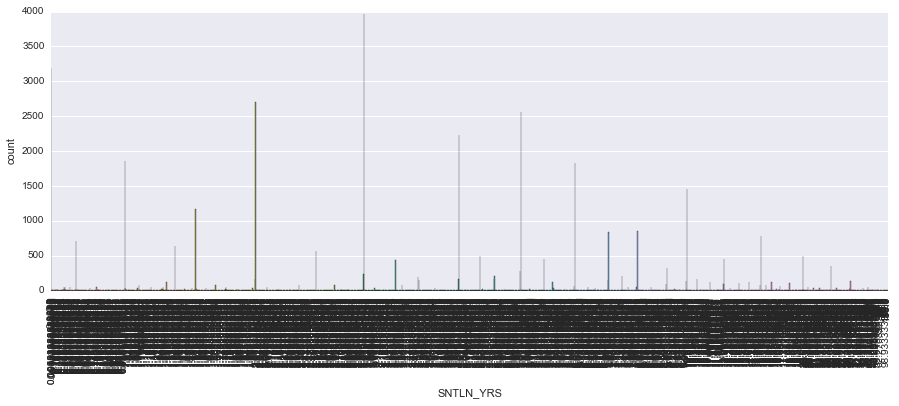

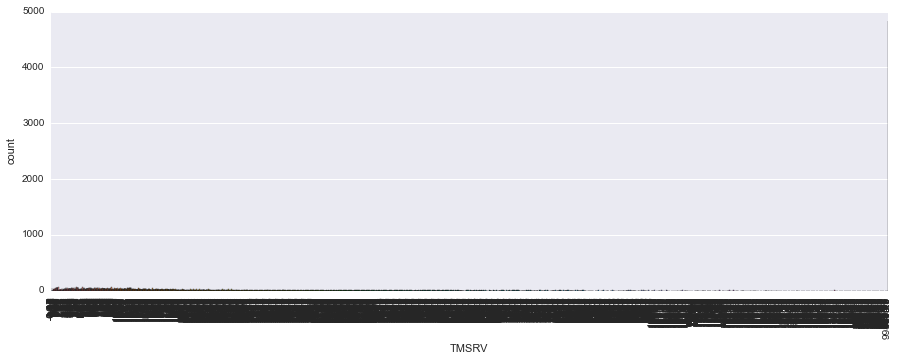

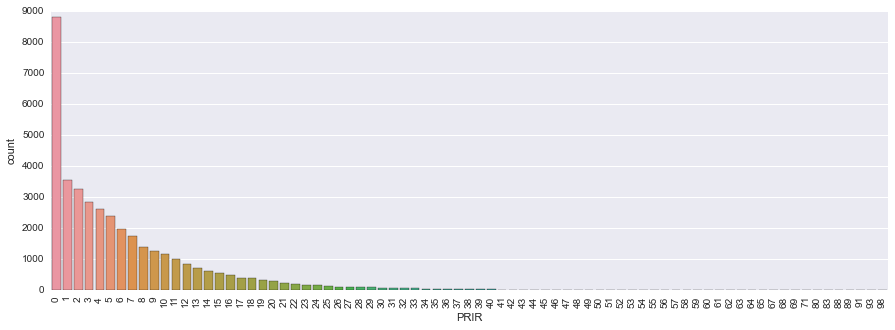

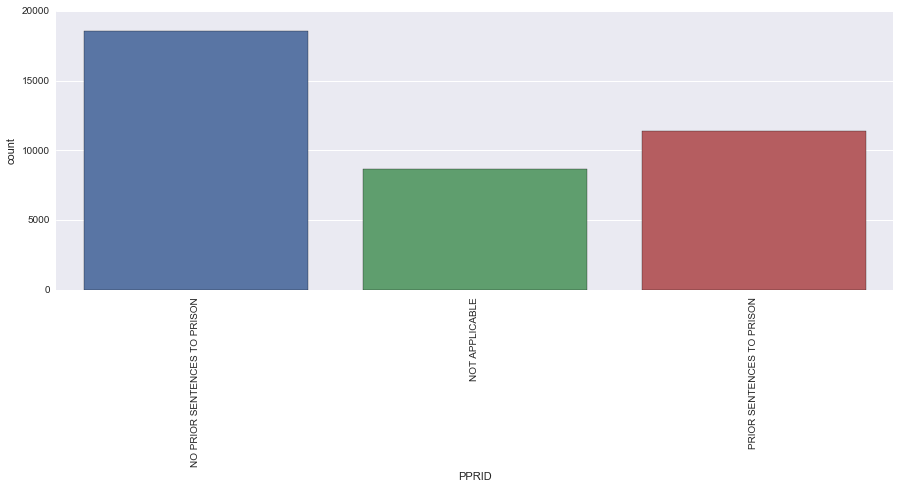

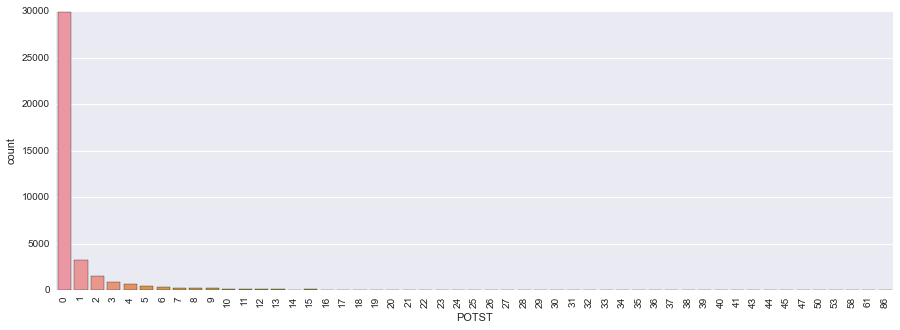

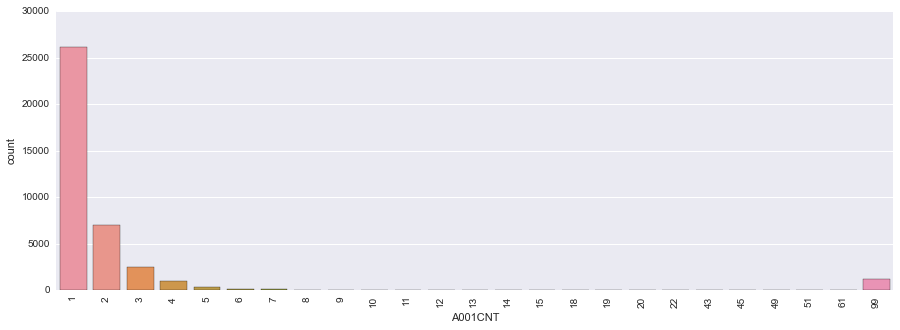

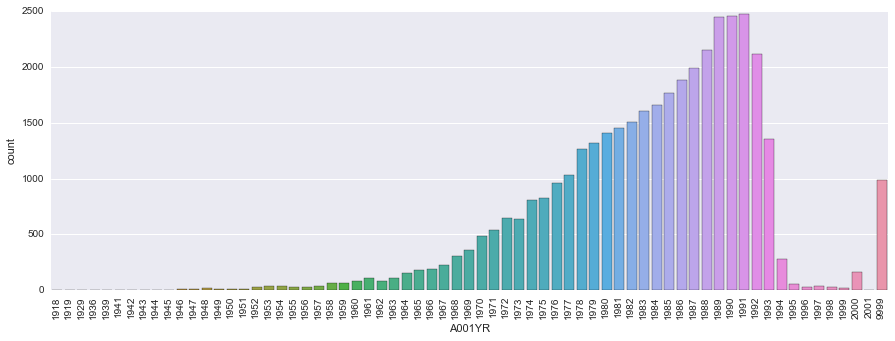

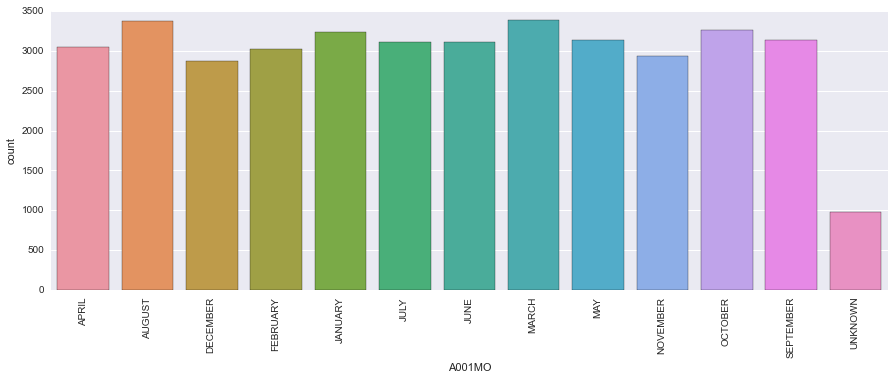

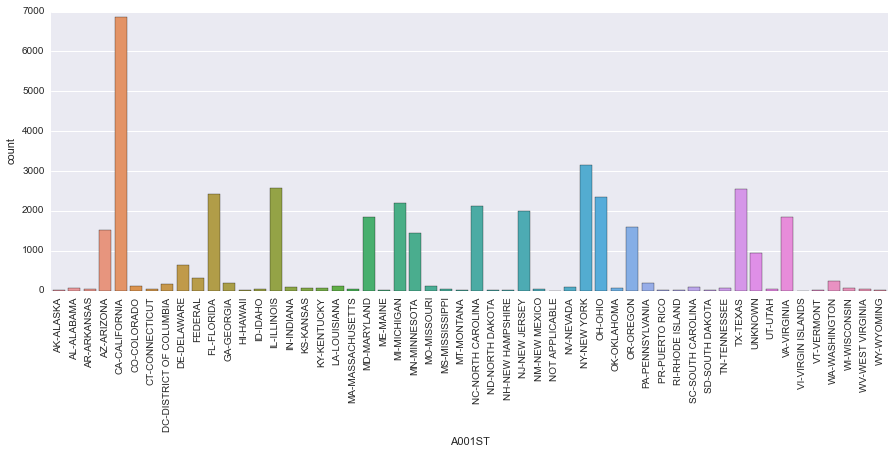

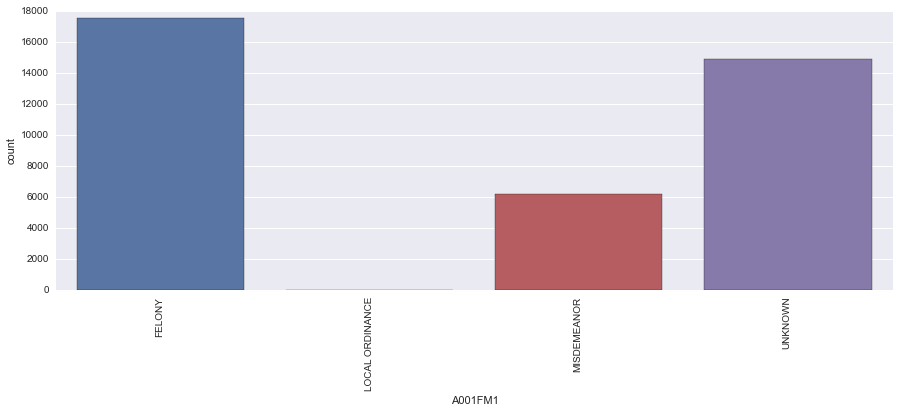

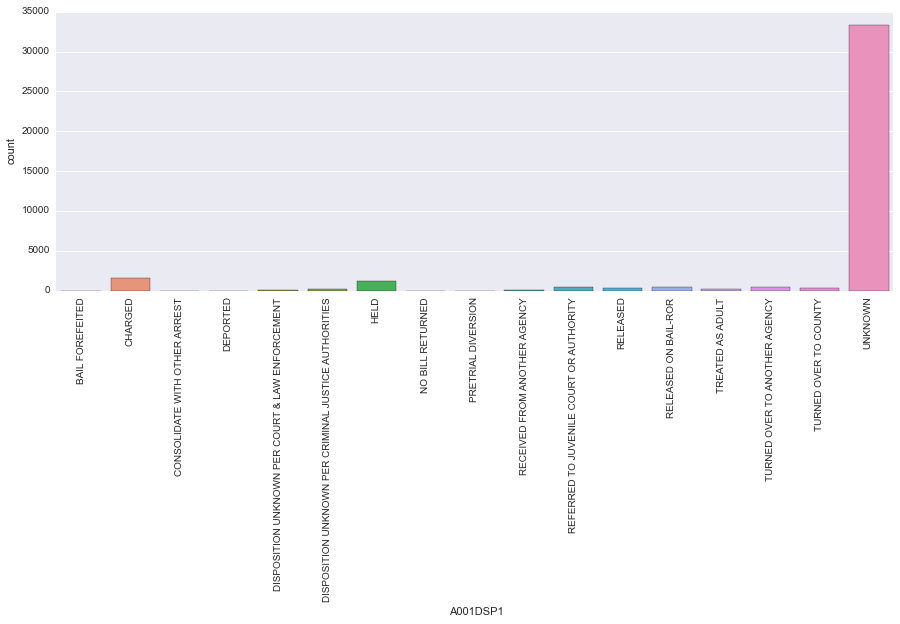

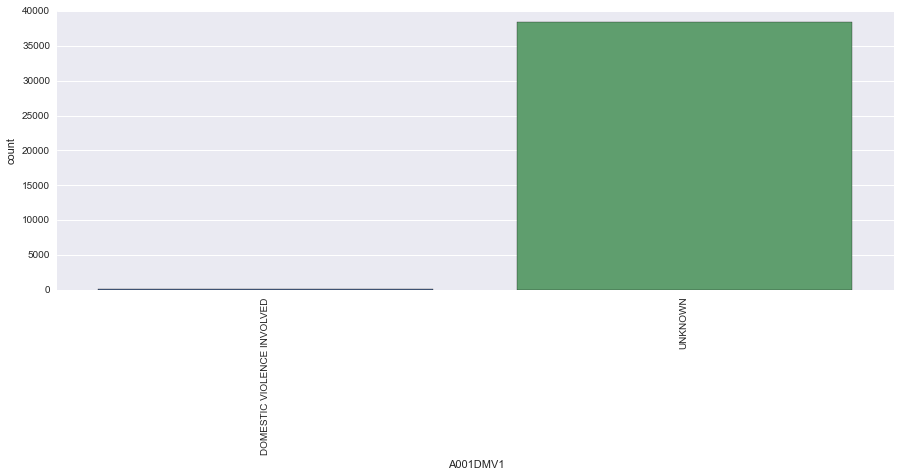

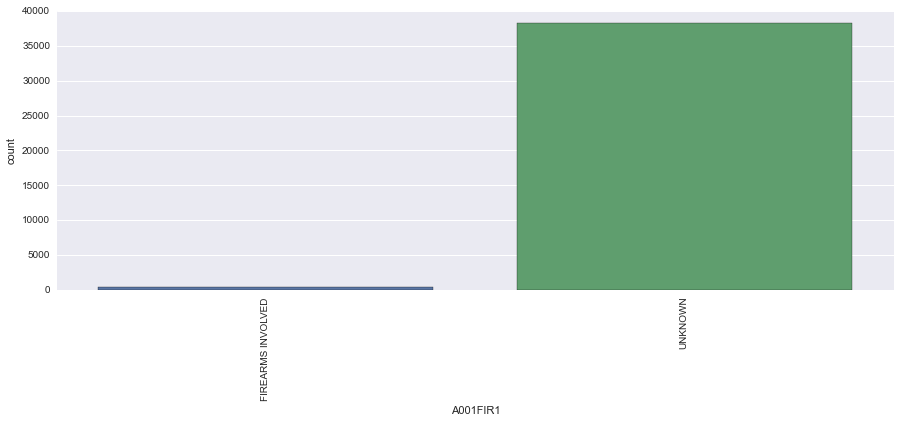

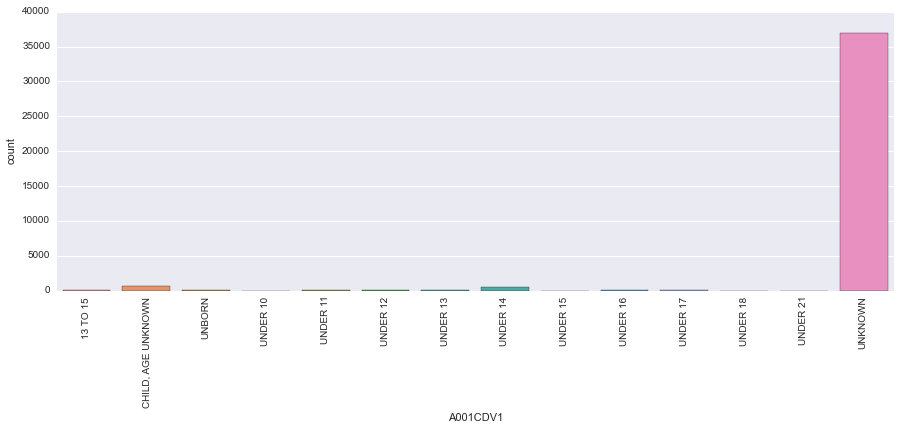

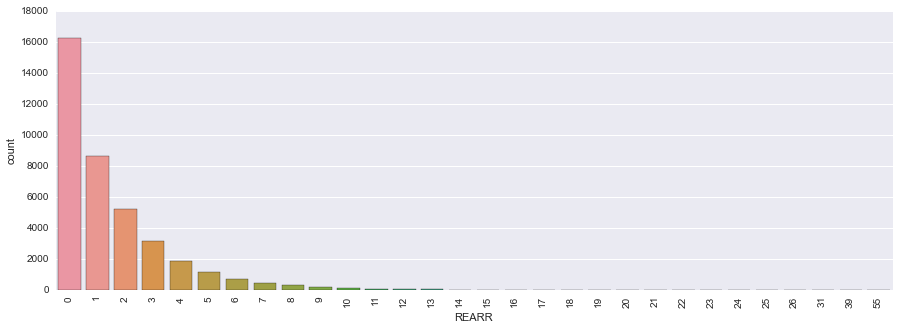

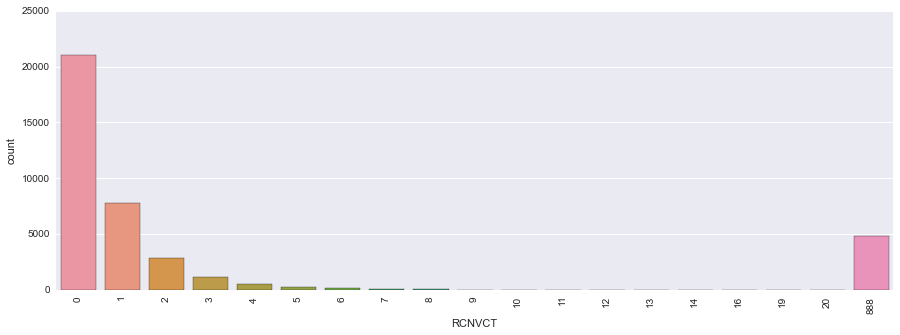

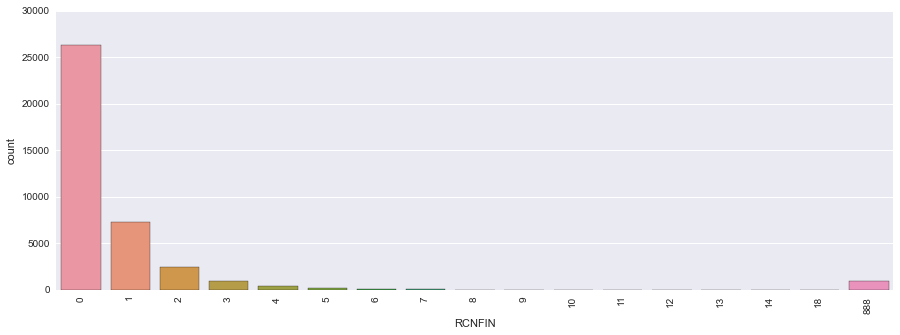

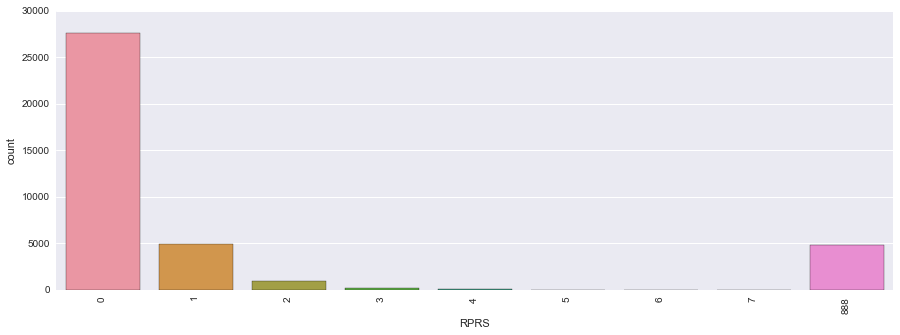

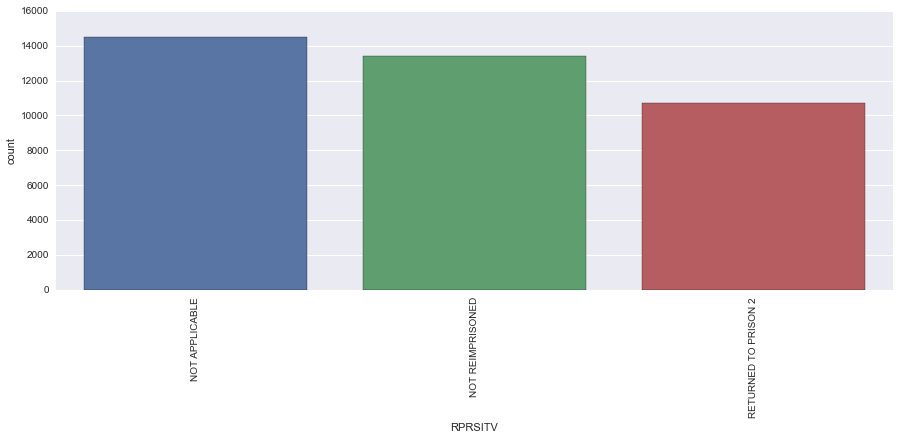

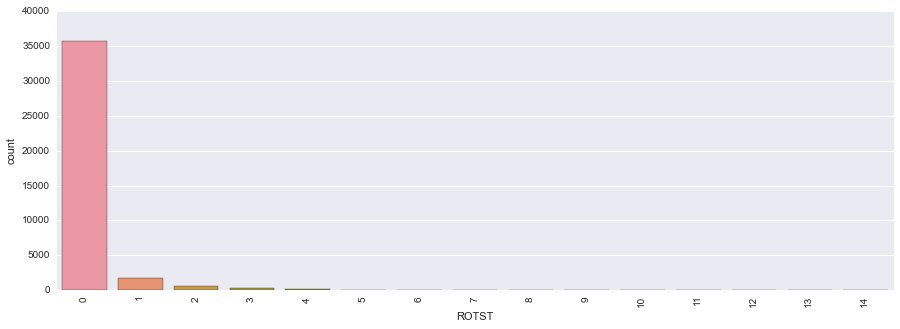

In [252]:
features = ['YEAROB1','SEX1','RACE1','ETHNIC1',
'RELTYP','NFRCTNS','DRUGAB','DRUGTRT','ALCTRT',
'SEXTRT','EDUCAT','VOCAT','STATE','DFM','DDMV','DFIR','DCDV','DEAD',
'SMPOFF5','RELAGE','RLAGE','SNTLN_YRS','TMSRV','PRIR','PPRID','POTST',
'A001CNT', 'A001YR','A001MO','A001ST','A001FM1','A001DSP1','A001DMV1','A001FIR1','A001CDV1',
'REARR','RCNVCT','RCNFIN','RPRS','RPRSITV','ROTST']
def make_plot(x):
    plt.figure(figsize = (15,5))
    sns.countplot(sorted(df2[x]))
    plt.xticks(rotation = 90)
    plt.xlabel(x)
    plt.show()

for x in features:
    make_plot(x)

###Exploring distributions of certain features

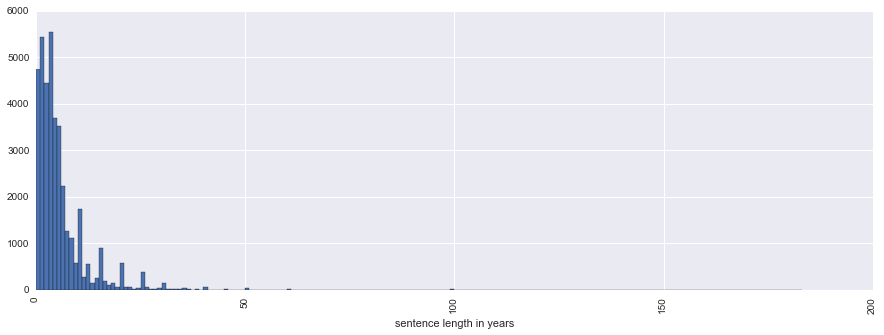

In [142]:
plt.figure(figsize = (15,5))
plt.hist(df2.SNTLN_YRS, bins=np.arange(min(df2.SNTLN_YRS), max(df2.SNTLN_YRS) + 1, 1))
plt.xticks(rotation = 90)
plt.xlabel("sentence length in years")
plt.show()

###Explore differences in rearrests vs. not rearrested

In [6]:
df2.groupby('RESP').mean()

,CASENUM,YEAROB1,RELAGE,SNTLN,TMSRV,PRIR,POTST,A001CNT,A001YR,REARR,RCNVCT,RCNFIN,RPRS,ROTST,TOT_PRARR,CAREER_LEN,SNTLN_YRS,TOTREARR
RESP,,,,,,,,,,,,,,,,,,
0,1617.548074,1959.142219,243006.008851,64.472167,239185.484699,5.237027,0.790012,6.895225,2361.952298,0.613184,212.706699,43.231368,212.620568,0.000000,6.020992,-367.952298,5.372681,0.000000
1,1639.353795,1962.386583,10867.592433,63.852809,23.140920,8.634014,1.298586,2.100450,1996.588015,2.626700,1.063011,0.746925,0.380723,0.292843,9.932600,-2.588015,5.321067,2.919543


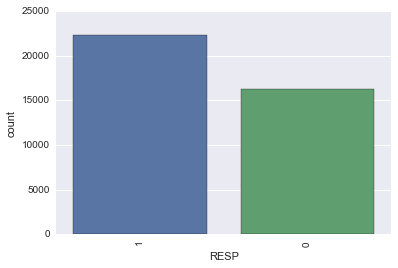

In [186]:
sns.countplot(df2.RESP)
plt.xticks(rotation = 90)
plt.show()

###Baseline predictor

In [225]:
def always_reoffend(x):
    return [1] * len(x)
y_pred = always_reoffend(x_test)

print "Baseline = %0.2f" % accuracy_score(y_test, y_pred) 

Baseline = 0.59


###Set up selected features, train/test split and scale

In [7]:
y, X = dmatrices('RESP ~ SEX1+RACE1+ETHNIC1+RELTYP+NFRCTNS+DRUGAB+DRUGTRT+ALCTRT+SEXTRT+EDUCAT+VOCAT+STATE+DFM+DDMV+DFIR+DCDV+DEAD+SMPOFF5+RELAGE+RLAGE+SNTLN+TMSRV+PRIR+PPRID+POTST+A001CNT+A001YR+A001MO+A001ST+A001FM1+A001DSP1+A001DMV1+A001FIR1+A001CDV1', data=df2, return_type='dataframe')

y = np.ravel(y)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7)

std_scale = preprocessing.StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

###Train model and evaluate test accuracy

In [8]:
def test_model(name, main_model):
    model = main_model()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print name, "accuracy score:", accuracy_score(y_test, model.predict(x_test))

#test_model("KNN", KNeighborsClassifier)
test_model("Logistic Regression", LogisticRegression)
#test_model("Gaussian Naive Bayes", GaussianNB)
#test_model("SVM Classifier", SVC)
#test_model("Decision Tree", DecisionTreeClassifier)
#test_model("Random Forest", RandomForestClassifier)

Logistic Regression accuracy score: 0.726358148893


###Look at train accuracy (overfit?)

In [10]:
def train_model(name, main_model):
    model = main_model()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    print name, "accuracy score:", accuracy_score(y_train, model.predict(x_train))

#train_model("KNN", KNeighborsClassifier)
train_model("Logistic Regression", LogisticRegression)
#train_model("Gaussian Naive Bayes", GaussianNB)
#train_model("SVM Classifier", SVC)
#train_model("Decision Tree", DecisionTreeClassifier)
#train_model("Random Forest", RandomForestClassifier)

Logistic Regression accuracy score: 0.72848857853


### Look at ROC curves

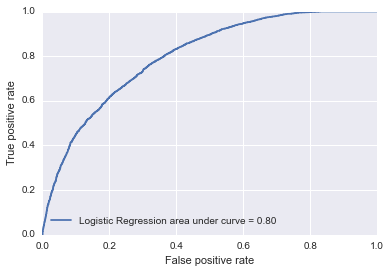

In [11]:
def curves(name, classifier):
    probas_ = classifier.fit(x_train, y_train).predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = "%s area under curve = %0.2f" 
             % (name, roc_auc_score(y_test, probas_[:, 1])))
    plt.legend(loc = "best")
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    #plt.title("ROC curves")
    
#curves("KNN", KNeighborsClassifier())
curves("Logistic Regression", LogisticRegression())
#curves("Gaussian Naive Bayes", GaussianNB())
#curves("SVM Classifier", SVC(probability = True))
#curves("Decision Tree", DecisionTreeClassifier())
#curves("Random Forest", RandomForestClassifier())

###Look at Logistic Regression coefficients for each feature

In [279]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[0.0]
1,SEX1[T.MALE],[0.106376074109]
2,SEX1[T.UNKNOWN],[0.0129882363765]
3,RACE1[T.ASIAN/PACIFIC ISLANDER],[-0.064442102417]
4,RACE1[T.BLACK],[0.080060436919]
5,RACE1[T.OTHER],[0.00431689283981]
6,RACE1[T.UNKNOWN],[-0.142538288219]
7,RACE1[T.WHITE],[-0.157689251291]
8,ETHNIC1[T.NONHISPANIC],[-0.0498979997428]
9,ETHNIC1[T.UNKNOWN],[-0.272006959981]
